In [1]:
%load_ext autoreload
%autoreload 2

# Lab 04 - Exam problem

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this folder structure if you write additional classes.


**TODO student** Read and explore the code provided both in this folder.

In [2]:
 # change 'inline' to 'notebook' to enable 3D plots
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.core.membership_functions.singleton_mf import SingletonMF
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule, Antecedent, Consequent
from fuzzy_systems.core.rules.default_fuzzy_rule import DefaultFuzzyRule
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func
from fuzzy_systems.core.fis.singleton_fis import SingletonFIS

from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer
from fuzzy_systems.view.fis_viewer import FISViewer
from fuzzy_systems.view.fis_surface import show_surface

## Introduction

In this notebook we will look at the exam problem. As a student you are an expert at planning which exam you must prepare first given a set of exams. For example, you know that you need to prepare the math exam a bit sooner than just 2 hours before it begins. But the same logic does not necessarily apply for all courses ;-)

Your task is to design from scratch a FIS where you are the expert. Indeed, we will give you the variables and their range but you are going to create the linguistic variables, the fuzzy rules and therefore the FIS.

* Input variables
  * **(D)ifficulty**: how hard the exam would be ?
    * from 0 (easy) to 10 (hard)
  * **(I)mportance**: how important the exam is ? Maybe you can ignore this exam because you already had good grades before. Or on the opposite, you absolutely need to nail this exam to pass the year.
    * from 0 (yolo) to 10 (my student's life depends on it)
  * **(R)emaining work**: You already studied a bit before so maybe there is no much work to do left. Or, on the opposite, you need to deep dive into the slides for the first time in your life.
    * from 0 (just skim the slides) to 100 (learn everything from scratch)
  * **(T)ime to exam**: When is the exam, tomorrow ? in 2 months ?
    * from 0 (in days, so today) to 30 (in days, so in 1 month)
    
* Output variables
  * **(P)riority**: Given the input variables above, what should be the priority of an exam ?
    * from 0 (lowest priority, i.e. this exam will be the last you will start to revise) to 1 (highest priority, i.e. this exam will be the first you will start to revise)
    

## Step 1 - Create the FIS

**TODO student**

* Using the specification above (input and output variables names and ranges) create a FIS from scratch
  * Create the linguistic variables you find relevant in terms of number of labels, name of the labels, shape of the MFs, ...
  * Create the fuzzy rules you find relevent in terms of number of rules, number of antecedents/consequents, presence or absence of the default rule, presence or absence of NOT conditions... Note: you are not forced to use all the variables for each rule, you are free to build your FIS the way you want. The only constraint is to be able to **justify every choice you made**.
  * Type of FIS 
* Justify your choices with a few words. **The justification is the main part of the evaluation so please be precise and complete**
* Show your FIS using FISViewer


## Step 2 - Do you trust your FIS ? aka Test the FIS

Now that you have created your FIS it is time to test it against your personnal feelings.

**TODO student**

* Test your FIS on the following cases (the 5 courses below). Do the output priorities seems coherent ? If not edit your FIS to improve the outputs.
  * Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4
  * Course 2: Difficulty=4, Importance=6, Remaining work=50, Time to exam=6
  * Course 3: Difficulty=10, Importance=7, Remaining work=10, Time to exam=10
  * Course 4: Difficulty=2, Importance=3, Remaining work=80, Time to exam=3
  * Course 5: Difficulty=6, Importance=9, Remaining work=40, Time to exam=14
* How the systems behave if the days pass but you have not progressed with your revision ? i.e. only the variable T(ime to exam) changes from t to t-1. How the priorities change? Does that seems coherent to you? Friendly reminder: maybe the function `show_surface()` can be useful.
* Ask yourself additional questions (between 4-6) to ask to your FIS to test it. For example test the following assumption: "The sooner the exam is the higher will the priority be".
* For each question justify your answers with plots and sentences.
* Confront your FIS against your personnal feelings. For example, a math exam is more likely to be difficult than a communication exam. You could create several additional courses with a dummy context (like the 5 courses above). For example, let's imagine that Course 6 is a Java exam scheduled tomorrow and you are a beast in Java so Difficulty=2, Importance=8, Remaining work=10, Time to work=1.
* Additional questions:
  * How your FIS behave with extreme values ? e.g. difficulty, importance and remaining work set to maximum and time to exam set to mimimum ?
  * Set N-2 variables to fixed values and plot using `show_surface()` the behaviour of 2 input variables. Comment the result with a few words. For example, do the input values correctly behave when their values change.
  * Generally, can you indicate some cons or weaknesses a such FIS could have? Does your FIS (or any FIS modelling the exam problem) incorporates everything to fully answer the exam problem? Is there something you know your FIS cannot capture that might help to predict the priority?
* **You may want to tune your FIS a couple of times in order to find a good FIS, so don't hesitate to go back to step 1**

Note: you may want to reuse classes from previous labs (such as ThreePointsLV for example). If so, please make sure that you fixed these in relation to the labs feedbacks.

Note: if there are odd behaviours, try to fix your FIS. If after several attempts to fix your FIS you found no way to fix it, then provide or guess some explanations/hypothesis.

Note: you should not need to implement new classes/functions but if you do please justify it and make sure there are working properly.

## Conclusion

This lab is less code-oriented but requires more (sort of) scientific thinking. Please show that you played and explored the behaviour with your FIS. Ask yourself many questions and confront your FIS against them. **Note that a minimal effort in doing so will result in a minimal grade.** You will mainly be evaluated on the justification and on your analysis. Remember you are the expert and this means you need to approve or disapprove the FIS you created.

-----------------

# Exercice - please answer below

**TODO student**: 

- Implement what is asked in the right folders
- Write the answer to the questions asked above. _For example_:

>In your opinion, what is the meaning of such a function?

blablabla

>Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.

_add some plots here..._

### Difficulty
#### Explication
For us, there is a limited scope there the exam is considered easy, and hard. All in between it's medium, like it's not the most important value. 

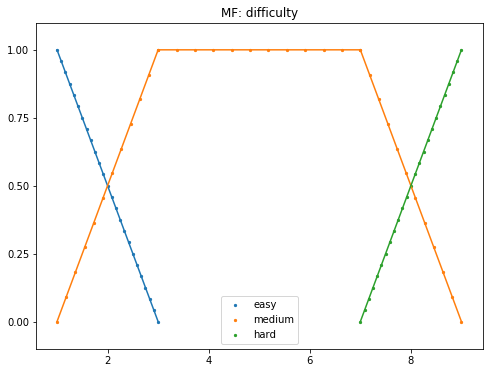

In [4]:
lv_difficulty = LinguisticVariable("difficulty", {
    "easy": LinPWMF([1, 1], [3, 0]),
    "medium": TrapMF(1, 3, 7, 9),
    "hard": LinPWMF([7,0], [9,1])
})

LinguisticVariableViewer(lv_difficulty).show()

### Importance
#### Explication
There is only two importance : I can repass the exam or i cannot, or interpreted in another way: I got really good grades in that course, so i don't need to work for this exam.

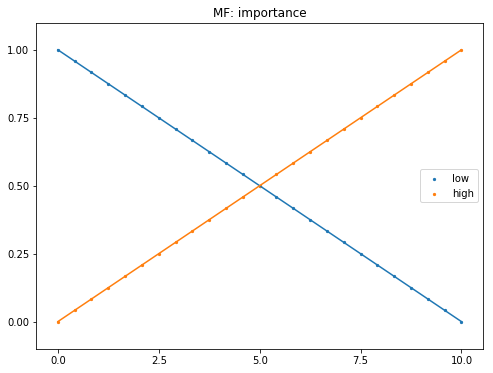

In [5]:
lv_importance = LinguisticVariable("importance", {
    "low": LinPWMF([0,1], [10,0]),
    "high": LinPWMF([0,0], [10,1])
})

LinguisticVariableViewer(lv_importance).show()

### remaining work
#### Explication
We separated the remaining work in three parts. few, average and a lots of work to do. We gave the most importance to the medium, it's only in the edge that we take care on our rules. It's like, if you work regulary it only gave you 25% to lower the priority, but if you're not a good student(75%) the priority rise.

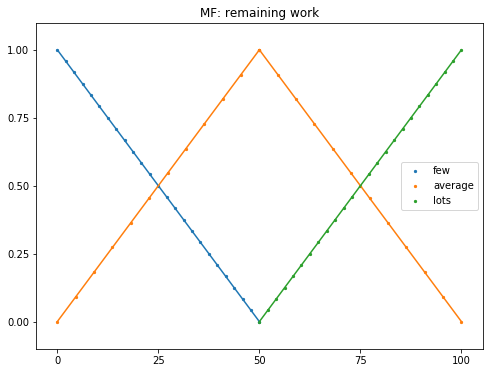

In [6]:
lv_remaining_work = LinguisticVariable("remaining work", {
    "few": LinPWMF([0,1], [50,0]),
    "average": TrapMF(0, 50, 50, 100),
    "lots": LinPWMF([50,0], [100,1])
})

LinguisticVariableViewer(lv_remaining_work).show()

### Time to exam
#### Explication
When there is only 7 days left, it is a high priority. because you'll have to work for differents exams, and the stress goes up in the sky. But it became really chill then there's 16days or more to work on your exam. We can see that we chosse 12 days, to become aware of the high priority risk we have.

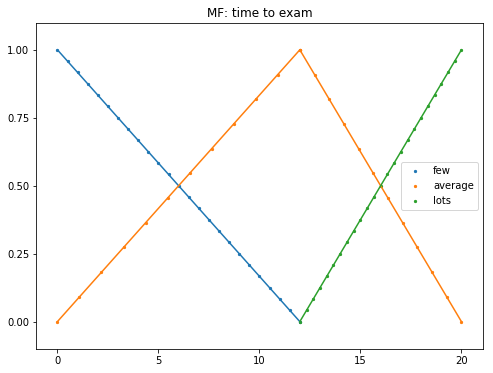

In [7]:
lv_time_to_exam = LinguisticVariable("time to exam", {
    "few": LinPWMF([0, 1], [12,0]),
    "average": TrapMF(0, 12, 12, 20),
    "lots": LinPWMF([12,0], [20,1])
})

LinguisticVariableViewer(lv_time_to_exam).show()

### Priority
#### Explication
Like some other variables, we put a 25/50/25 %

You can be chill for a time, like 75%, but if you reach the 25% of high, you really pushed to it, so you have to assume now

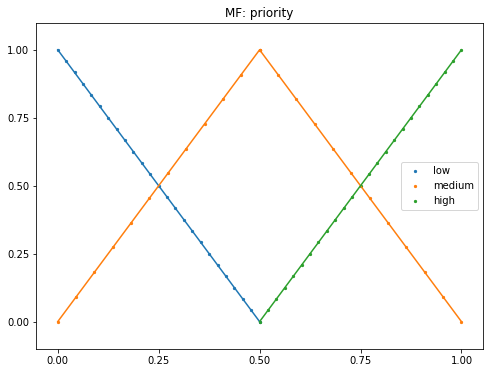

In [8]:
lv_priority = LinguisticVariable("priority", {
    "low": LinPWMF([0,1], [0.5,0]),
    "medium": TrapMF(0, 0.5, 0.5, 1),
    "high": LinPWMF([0.5, 0], [1,1])
})


LinguisticVariableViewer(lv_priority).show()

## Rules

In [9]:
r1 = FuzzyRule(
    ants=[
        Antecedent(lv_difficulty, "easy"),
        Antecedent(lv_importance, "low"),
        Antecedent(lv_remaining_work, "few"),
        Antecedent(lv_time_to_exam, "lots"),
    ],
        ant_act_func=AND_min,
    cons=[
        Consequent(lv_priority, "low"),
    ],
    impl_func=MIN
    
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_difficulty, "medium"),
        Antecedent(lv_importance, "low"),
        Antecedent(lv_remaining_work, "average"),
        Antecedent(lv_time_to_exam, "average"),
    ],
        ant_act_func=AND_min,
    cons=[
        Consequent(lv_priority, "medium"),
    ],
    impl_func=MIN
    
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_difficulty, "hard"),
        Antecedent(lv_importance, "high"),
        Antecedent(lv_remaining_work, "lots"),
        Antecedent(lv_time_to_exam, "few"),
    ],
        ant_act_func=OR_max,
    cons=[
        Consequent(lv_priority, "high"),
    ],
    impl_func=MIN
    
)

r4 = FuzzyRule(
    ants=[
        Antecedent(lv_importance, "low"),
        Antecedent(lv_difficulty, "easy")
    ],
        ant_act_func=OR_max,
    cons=[
        Consequent(lv_priority, "low"),
    ],
    impl_func=MIN
)

r5 = FuzzyRule(
    ants=[
        Antecedent(lv_remaining_work, "lots"),
        Antecedent(lv_time_to_exam, "few")
    ],
        ant_act_func=AND_min,
    cons=[
        Consequent(lv_priority, "high"),
    ],
    impl_func=MIN
)

### FIS

predicted_value {'priority': 0.4591635998661759}


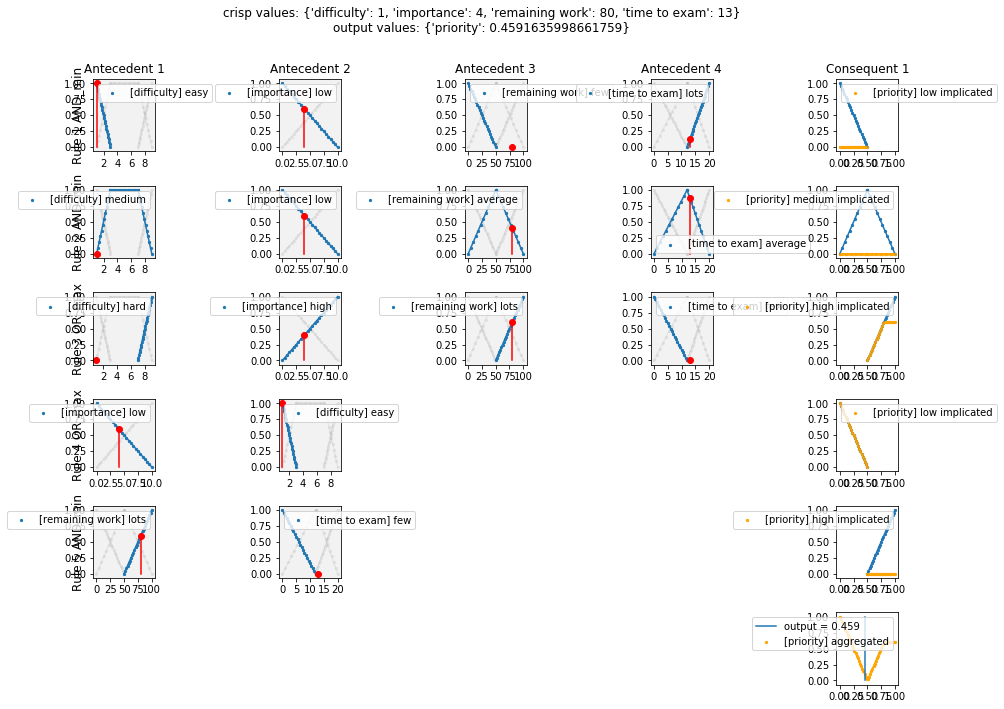

In [10]:

# Step 3: create the FIS
fis = FIS(
    rules=[r1, r2, r3, r4, r5],
    aggr_func=np.max, # aggregation function or "how the implicated consequent(s) will be combined together"
    defuzz_func=COA_func # defuzzification or "how the "final" membership function created after the aggregation step will be interpreted as a output crisp value
)

# Step 4: execute the FIS 
input_values = {'difficulty': 1, 
                'importance': 4, 
                'remaining work': 80, 
                'time to exam': 13}

predicted_value = fis.predict(input_values)
print("predicted_value", predicted_value)


# Step 5: View the FIS
fisv = FISViewer(fis, figsize=(12, 10))
fisv.show()

## Step 2

Test your FIS on the following cases (the 5 courses below). Do the output priorities seems coherent ? If not edit your FIS to improve the outputs.
Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4
Course 2: Difficulty=4, Importance=6, Remaining work=50, Time to exam=6
Course 3: Difficulty=10, Importance=7, Remaining work=10, Time to exam=10
Course 4: Difficulty=2, Importance=3, Remaining work=80, Time to exam=3
Course 5: Difficulty=6, Importance=9, Remaining work=40, Time to exam=14

In [11]:

    
# Step 4: execute the FIS 
test1 = {
        'difficulty': 8, 
        'importance': 4, 
        'remaining work': 30, 
        'time to exam': 4}

test2 = {
        'difficulty': 4, 
        'importance': 6, 
        'remaining work': 50, 
        'time to exam': 6}

test3 = {'difficulty': 10, 
                'importance': 7, 
                'remaining work': 10, 
                'time to exam': 10}

test4 = {'difficulty': 2, 
                'importance': 3, 
                'remaining work': 80, 
                'time to exam': 3}

test5 = {'difficulty': 6, 
                'importance': 9, 
                'remaining work': 40, 
                'time to exam': 14}


print("Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4, predicted_value :", fis.predict(test1))
print("Difficulty=4, Importance=6, Remaining work=50, Time to exam=6, predicted_value :", fis.predict(test2))
print("Difficulty=10, Importance=7, Remaining work=10, Time to exam=10, predicted_value : ", fis.predict(test3))
print("Difficulty=2, Importance=3, Remaining work=80, Time to exam=3, predicted_value : ", fis.predict(test4))
print("Difficulty=6, Importance=9, Remaining work=40, Time to exam=14, predicted_value : ", fis.predict(test5))

EASY should be 0, predicted_value : {'priority': 0.16}
MEDIUM should be 0.5, predicted_value : {'priority': 0.5000000000000001}
HARD should be 1, predicted_value : {'priority': 0.84}
Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4, predicted_value : {'priority': 0.5107148162557916}
Difficulty=4, Importance=6, Remaining work=50, Time to exam=6, predicted_value : {'priority': 0.5427444569137905}
Difficulty=10, Importance=7, Remaining work=10, Time to exam=10, predicted_value :  {'priority': 0.629482727371588}
Difficulty=2, Importance=3, Remaining work=80, Time to exam=3, predicted_value :  {'priority': 0.5063935352070449}
Difficulty=6, Importance=9, Remaining work=40, Time to exam=14, predicted_value :  {'priority': 0.737824106877322}


> How the systems behave if the days pass but you have not progressed with your revision ? i.e. only the variable T(ime to exam) changes from t to t-1. How the priorities change? Does that seems coherent to you? Friendly reminder: maybe the function `show_surface()` can be useful.

Priority t=15:  {'priority': 0.5000000000000001}
Priority t=14:  {'priority': 0.5000000000000001}


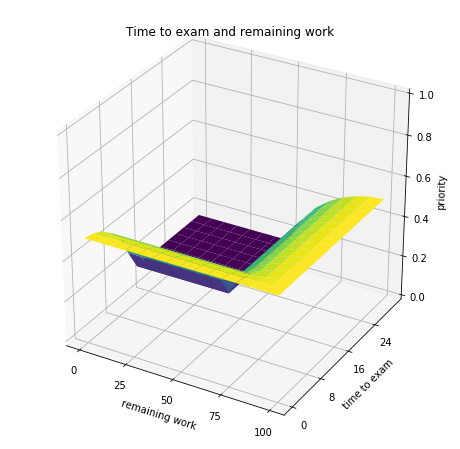

In [12]:
testTime1 = {'difficulty': 5, 
                'importance': 5, 
                'remaining work': 50, 
                'time to exam': 15}

testTime2 = {'difficulty': 5,
                    'importance': 5,
                    'remaining work': 50,
                    'time to exam': 14}

print("Priority t=15: ", fis.predict(testTime1))
print("Priority t=14: ", fis.predict(testTime2))

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
o_labels = {'difficulty': 0, 'importance': 0}
show_surface(fis, ax=ax, title="Time to exam and remaining work", x_label="remaining work", y_label="time to exam", 
             other_labels=o_labels, z_label="priority", 
             n_pts=15, x_range=(0,100), y_range=(0,30), z_range=(0,1))

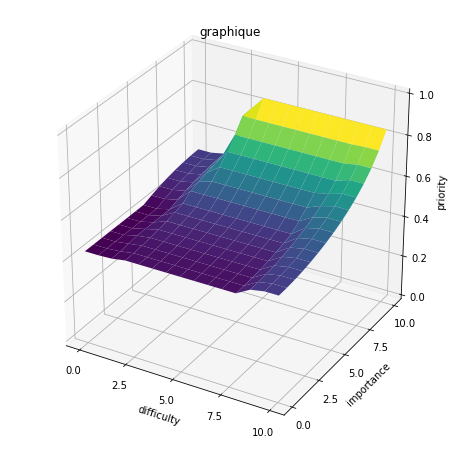

In [13]:

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
o_labels = {'remaining work': 75, 'time to exam': 7}
show_surface(fis, ax=ax, title="graphique", x_label="difficulty", y_label="importance", 
             other_labels=o_labels, z_label="priority", 
             n_pts=15, x_range=(0,10), y_range=(0,10), z_range=(0,1))

When changing the time to exam from t to t-1, the priority doesn't change. This is not very coherent, as the priority should increase in this case. The priority does increase when time to exam diminishes, but not as fast and as reactive as desired.

* Assumption 1: The more remaining work there is to do, the higher the priority will be   
This is the case as can be seen in the previous plot, it is the same behaviour as for time to exam
* Assumption 2: If the importance is low and the difficulty is easy, the priority is low   

Should be low:  {'priority': 0.2553174794369687}


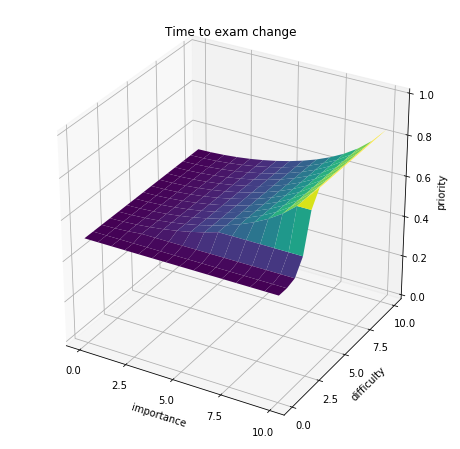

In [15]:
test6 = {'difficulty': 1,
                'importance': 1,
                'remaining work': 50,
                'time to exam': 15}

print('Should be low: ', fis.predict(test6))

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
o_labels = {'remaining work': 0, 'time to exam': 0}
show_surface(fis, ax=ax, title="Time to exam change", x_label="importance", y_label="difficulty", 
             other_labels=o_labels, z_label="priority", 
             n_pts=15, x_range=(0,10), y_range=(0,10), z_range=(0,1))

This is the case, as can be seen in the result of the prediction.

* Assumption 3: The higher the difficulty is the higher will the priority be   
The difficulty has less importance when the priority goes up because of the remaining work and the time to exam, because, when you are at that point, you only have to pray.
* Assumption 4: The higher the importance is the higher will the priority be   
When on difficulty, the importance has it's importance. 

results below

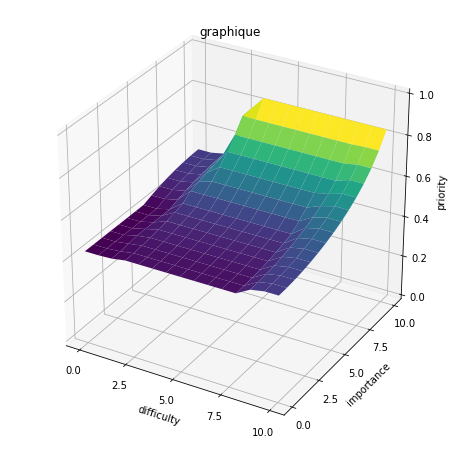

In [17]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
o_labels = {'remaining work': 75, 'time to exam': 7}
show_surface(fis, ax=ax, title="graphique", x_label="difficulty", y_label="importance", 
             other_labels=o_labels, z_label="priority", 
             n_pts=15, x_range=(0,10), y_range=(0,10), z_range=(0,1))

In [21]:


easy = {'difficulty': 0, 
        'importance': 0, 
        'remaining work': 0, 
        'time to exam': 30}

medium = {'difficulty': 5, 
        'importance': 5, 
        'remaining work': 50, 
        'time to exam': 15}

hard = {'difficulty': 10, 
        'importance': 10, 
        'remaining work': 100, 
        'time to exam': 0}

assumption5 = {'difficulty': 10, 
                'importance': 0, 
                'remaining work': 100, 
                'time to exam': 0}

assumption6 = {'difficulty': 0, 
                'importance': 10, 
                'remaining work': 0, 
                'time to exam': 30}

print("EASY should be 0, predicted_value :", fis.predict(easy))
print("MEDIUM should be 0.5, predicted_value :", fis.predict(medium))
print("HARD should be 1, predicted_value :", fis.predict(hard))
print("HARD, but no importance :", fis.predict(assumption5))
print("EASY, but big importance :", fis.predict(assumption6))

EASY should be 0, predicted_value : {'priority': 0.16}
MEDIUM should be 0.5, predicted_value : {'priority': 0.5000000000000001}
HARD should be 1, predicted_value : {'priority': 0.84}
HARD, but no importance : {'priority': 0.49999999999999994}
EASY, but big importance : {'priority': 0.49999999999999994}


We can see that in the extreme cases, it's answer well. And that the importance act really like we wanted on this case. The importance having two linears variables centered on 5, act really good has the extreme inverse of importance gave 0.5 priority, perfect

### To submit

* Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 
* The mail's subject is `[LFA] rendu labXX` where `XX` is the lab number

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**

Note: Your notebooks must run completely even after the Jupyter kernel has been restarted. To ensure it will be the case when your lab will be reviewed, please select in the top menu "Kernel -> Restart and Run all" and check that the output of each cell is the desired output you want to submit.